In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-sales-dataset-popular-marketplace-data/Online Sales Data.csv


In [2]:
df=pd.read_csv("/kaggle/input/online-sales-dataset-popular-marketplace-data/Online Sales Data.csv")
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [3]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [5]:
df.tail()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal
239,10240,2024-08-27,Sports,Yeti Rambler 20 oz Tumbler,2,29.99,59.98,Asia,Credit Card


In [6]:
#Maximum Revenue
df.loc[df['Total Revenue'].idxmax()]

Transaction ID                    10103
Date                         2024-04-12
Product Category            Electronics
Product Name        Canon EOS R5 Camera
Units Sold                            1
Unit Price                      3899.99
Total Revenue                   3899.99
Region                    North America
Payment Method              Credit Card
Name: 102, dtype: object

In [7]:
#Maximum Units Sold
df.loc[df['Units Sold'].idxmax()]

Transaction ID                          10063
Date                               2024-03-03
Product Category                     Clothing
Product Name        Hanes ComfortSoft T-Shirt
Units Sold                                 10
Unit Price                               9.99
Total Revenue                            99.9
Region                                   Asia
Payment Method                     Debit Card
Name: 62, dtype: object

In [8]:
#Average Monthly Sales Analysis
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.groupby('Month').agg({'Units Sold':'mean','Unit Price':'mean','Total Revenue':'mean'})

,Units Sold,Unit Price,Total Revenue
Month,,,
1,2.193548,288.506129,469.300645
2,2.655172,212.423793,372.530000
3,2.645161,260.894839,414.491613
4,2.166667,302.538667,415.056333
5,1.935484,211.998387,272.757742
6,2.033333,213.737333,246.151667
7,1.709677,177.436774,219.260645
8,1.925926,221.572222,269.559630


In [9]:
#correlation between the units sold and unit Price
x=df['Units Sold'].corr(df['Unit Price'])
x

-0.30858262327014113

In [10]:
#Region that has Maximum Revenue in sales
x=df.loc[df['Total Revenue'].idxmax(),'Region']
print("Max Revenue: ",x)
#Region that has Minimum Revenue in Sales
y=df.loc[df['Total Revenue'].idxmin(),'Region']
print("Min Revenue: ",y)

Max Revenue:  North America
Min Revenue:  Europe


In [11]:
import matplotlib.pyplot as plt

In [12]:
#How does the number of Units Sold vary with respect to the Region? 
x=df.groupby('Region')['Units Sold'].mean()
print("Units sold wrt Region")
print(x)
#How does the Total Revenue vary with respect to the Region? 
x=df.groupby('Region')['Total Revenue'].mean()
print("\nTotal Revenue wrt Region")
print(x)

Units sold wrt Region
Region
Asia             2.9125
Europe           1.3125
North America    2.2500
Name: Units Sold, dtype: float64

Total Revenue wrt Region
Region
Asia             280.693125
Europe           265.850750
North America    460.554250
Name: Total Revenue, dtype: float64


In [13]:
#Which month had the highest and lowest number of Sales?
x = df.groupby('Month')
print(x['Units Sold'].min())
print(x['Units Sold'].max())

Month
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
Name: Units Sold, dtype: int64
Month
1     6
2     6
3    10
4     6
5     5
6     5
7     4
8     4
Name: Units Sold, dtype: int64


Text(0.5, 1.0, 'Units Sold vs Region')

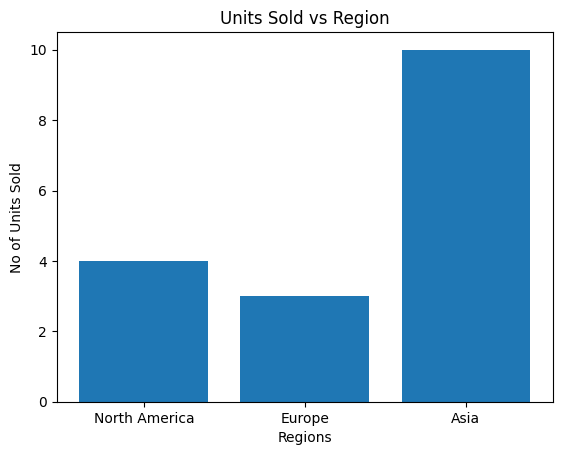

In [14]:
#Units Sold vs Region
plt.bar(df['Region'],df['Units Sold'])
plt.xlabel("Regions")
plt.ylabel("No of Units Sold")
plt.title("Units Sold vs Region")

Text(0.5, 1.0, 'Units Sold vs Month in 2024')

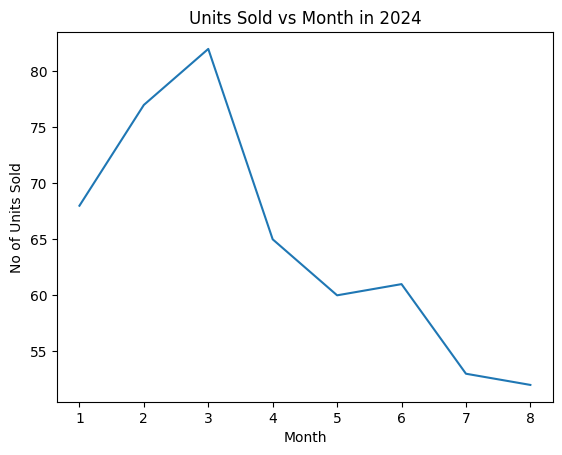

In [15]:
#Months vs Units Sold
y=df.groupby('Month')['Units Sold'].sum()
plt.plot(y.index,y.values)
plt.xlabel("Month")
plt.ylabel("No of Units Sold")
plt.title("Units Sold vs Month in 2024")

Text(0.5, 1.0, 'Total Revenue vs Month in 2024')

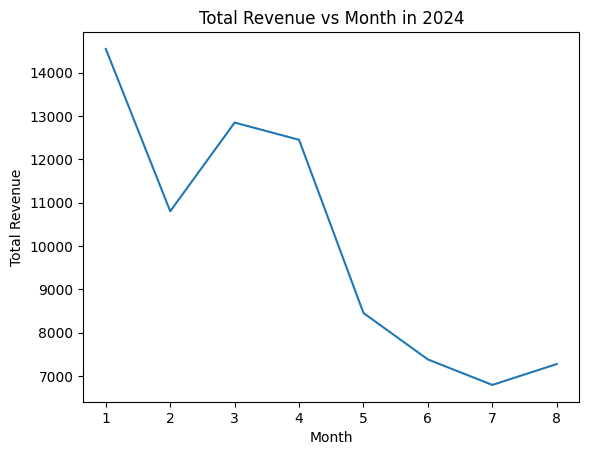

In [16]:
#Months vs Total Revenue
y=df.groupby('Month')['Total Revenue'].sum()
plt.plot(y.index,y.values)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Total Revenue vs Month in 2024")

([<matplotlib.patches.Wedge at 0x7f4ac8bc8520>,
 [Text(0.1727367704572014, 1.0863526168477786, 'Asia'),
  Text(-1.0436605995874633, -0.3475234565734186, 'Europe'),
  Text(0.5071014344460757, -0.9761394035601332, 'North America')])

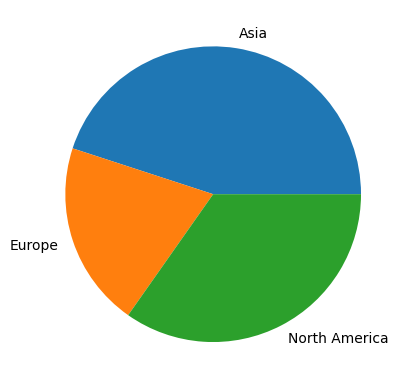

In [17]:
#Overal Region wise sales
x=df.groupby('Region')['Units Sold'].sum()
plt.pie(x.values,labels=x.index)

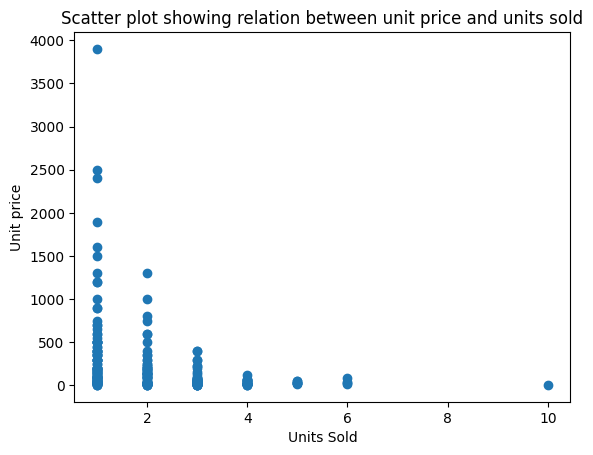

In [18]:
plt.title("Scatter plot showing relation between unit price and units sold")
plt.xlabel("Units Sold")
plt.ylabel("Unit price")
plt.scatter(df['Units Sold'],df['Unit Price'])

In [19]:
import seaborn as sns

Text(95.72222222222221, 0.5, 'Region')

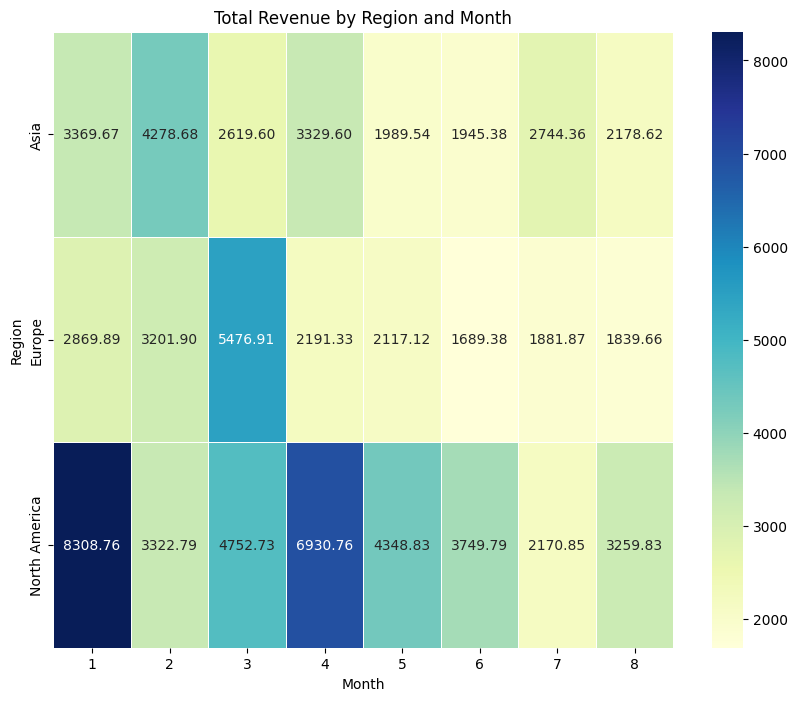

In [20]:
heatmap_data = df.pivot_table(index='Region', columns='Month', values='Total Revenue', aggfunc='sum')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('Total Revenue by Region and Month')
plt.xlabel('Month')
plt.ylabel('Region')